In [469]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
#plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'

nodes = pd.read_csv("nodes.csv", sep="|") 
links = pd.read_csv("links.csv", sep="|")
nodes["name"] = nodes.apply(lambda x: json.loads(x["fields"]).get("name"),axis=1)
merged = pd.merge(links, nodes[["id","name","type"]], left_on='source', right_on="id")
merged = pd.merge(merged, nodes[["id","name","type"]], left_on='dest', right_on="id")

master_colors=['lightseagreen', 'goldenrod', 'royalblue','red', 'lightcoral','green','tomato','powderblue']

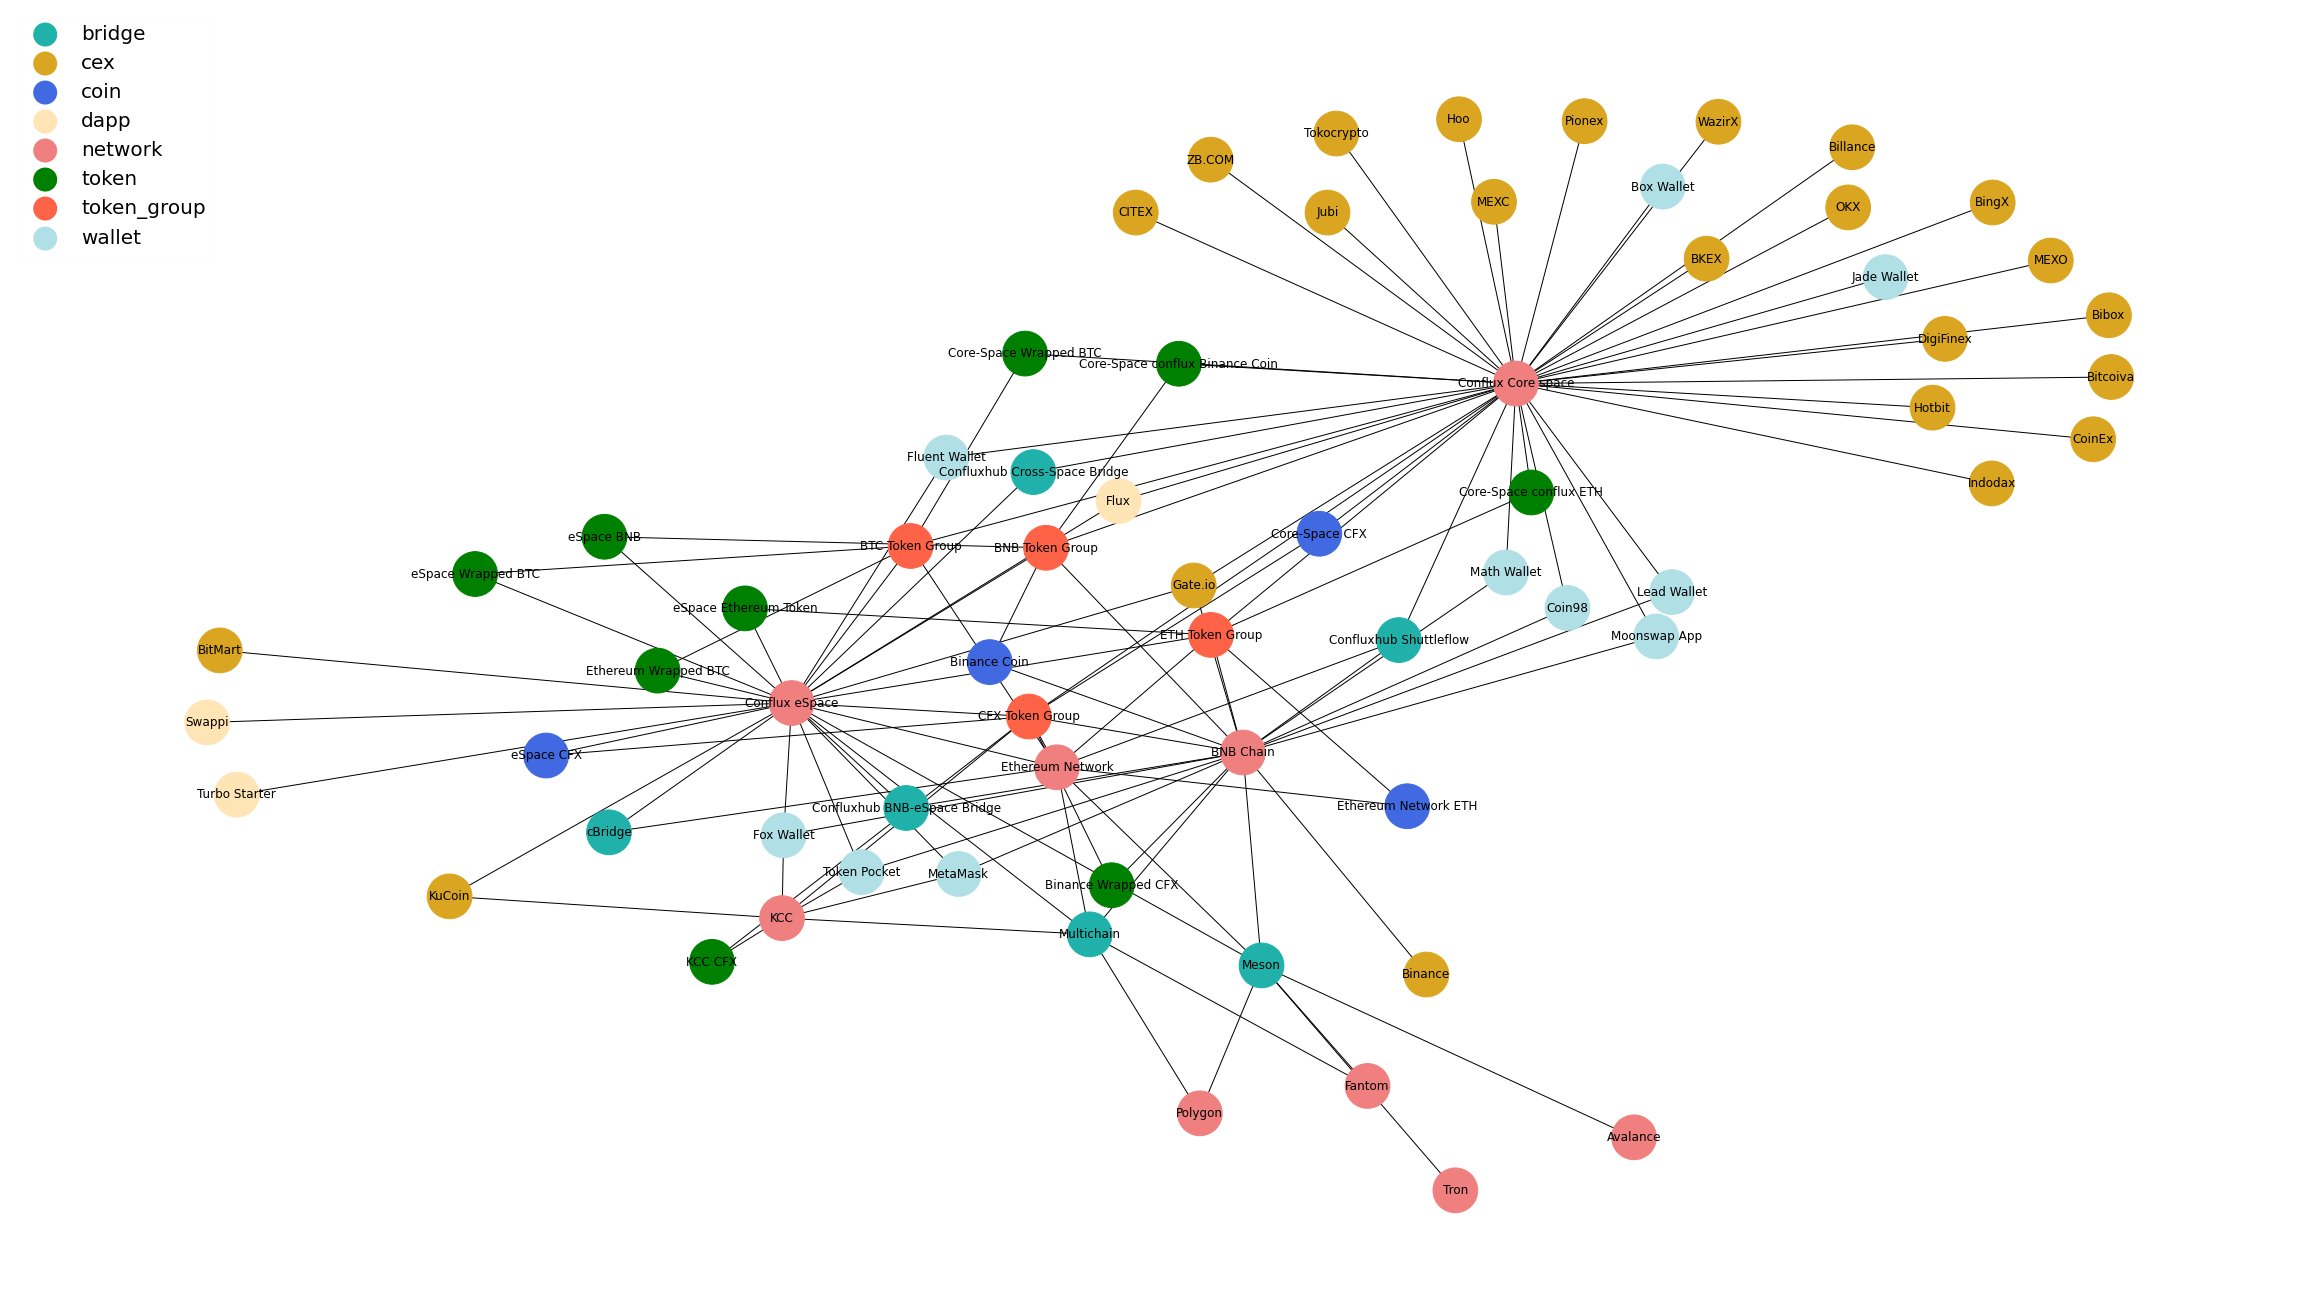

In [376]:
#all links

def chartAll(merged,nodes,links):

    G = nx.from_pandas_edgelist(merged,source="name_x",target="name_y")

    types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
    types = types[types["ID"].isin(list(G.nodes))]
    types = types.set_index('ID')
    types = types.reindex(G.nodes())
    types['type'] = pd.Categorical(types['type'])

    catlist = list(types['type'].cat.categories)
    catcodes = list(types['type'].cat.codes)

    filtered_colors = master_colors[0:len(catlist)]
    cmap = matplotlib.colors.ListedColormap(filtered_colors)

    fig = plt.figure(1, figsize=(32, 18))
    
    nx.draw_spring(G,
                   with_labels = True, 
                   font_size=12, 
                   font_family="sans-serif", 
                   node_size=2000,
                   node_color=catcodes,
                   cmap=cmap
                  )
    
    for i in catlist:
        plt.scatter([],
                    [],
                    c=cmap.colors[catlist.index(i)],
                    edgecolors='none', label=i)


    plt.legend(loc='upper left',
               framealpha=0.05, 
               markerscale= 4,
               prop={'size': 20}
              )
    
    plt.savefig('everything.png', transparent=True)
    '''
    nx.draw(G)  
    nx.draw_random(G)  
    nx.draw_circular(G)  
    nx.draw_spectral(G)  
    nx.draw_spring(G)  
    '''
    return G
G = chartAll(merged,nodes,links)

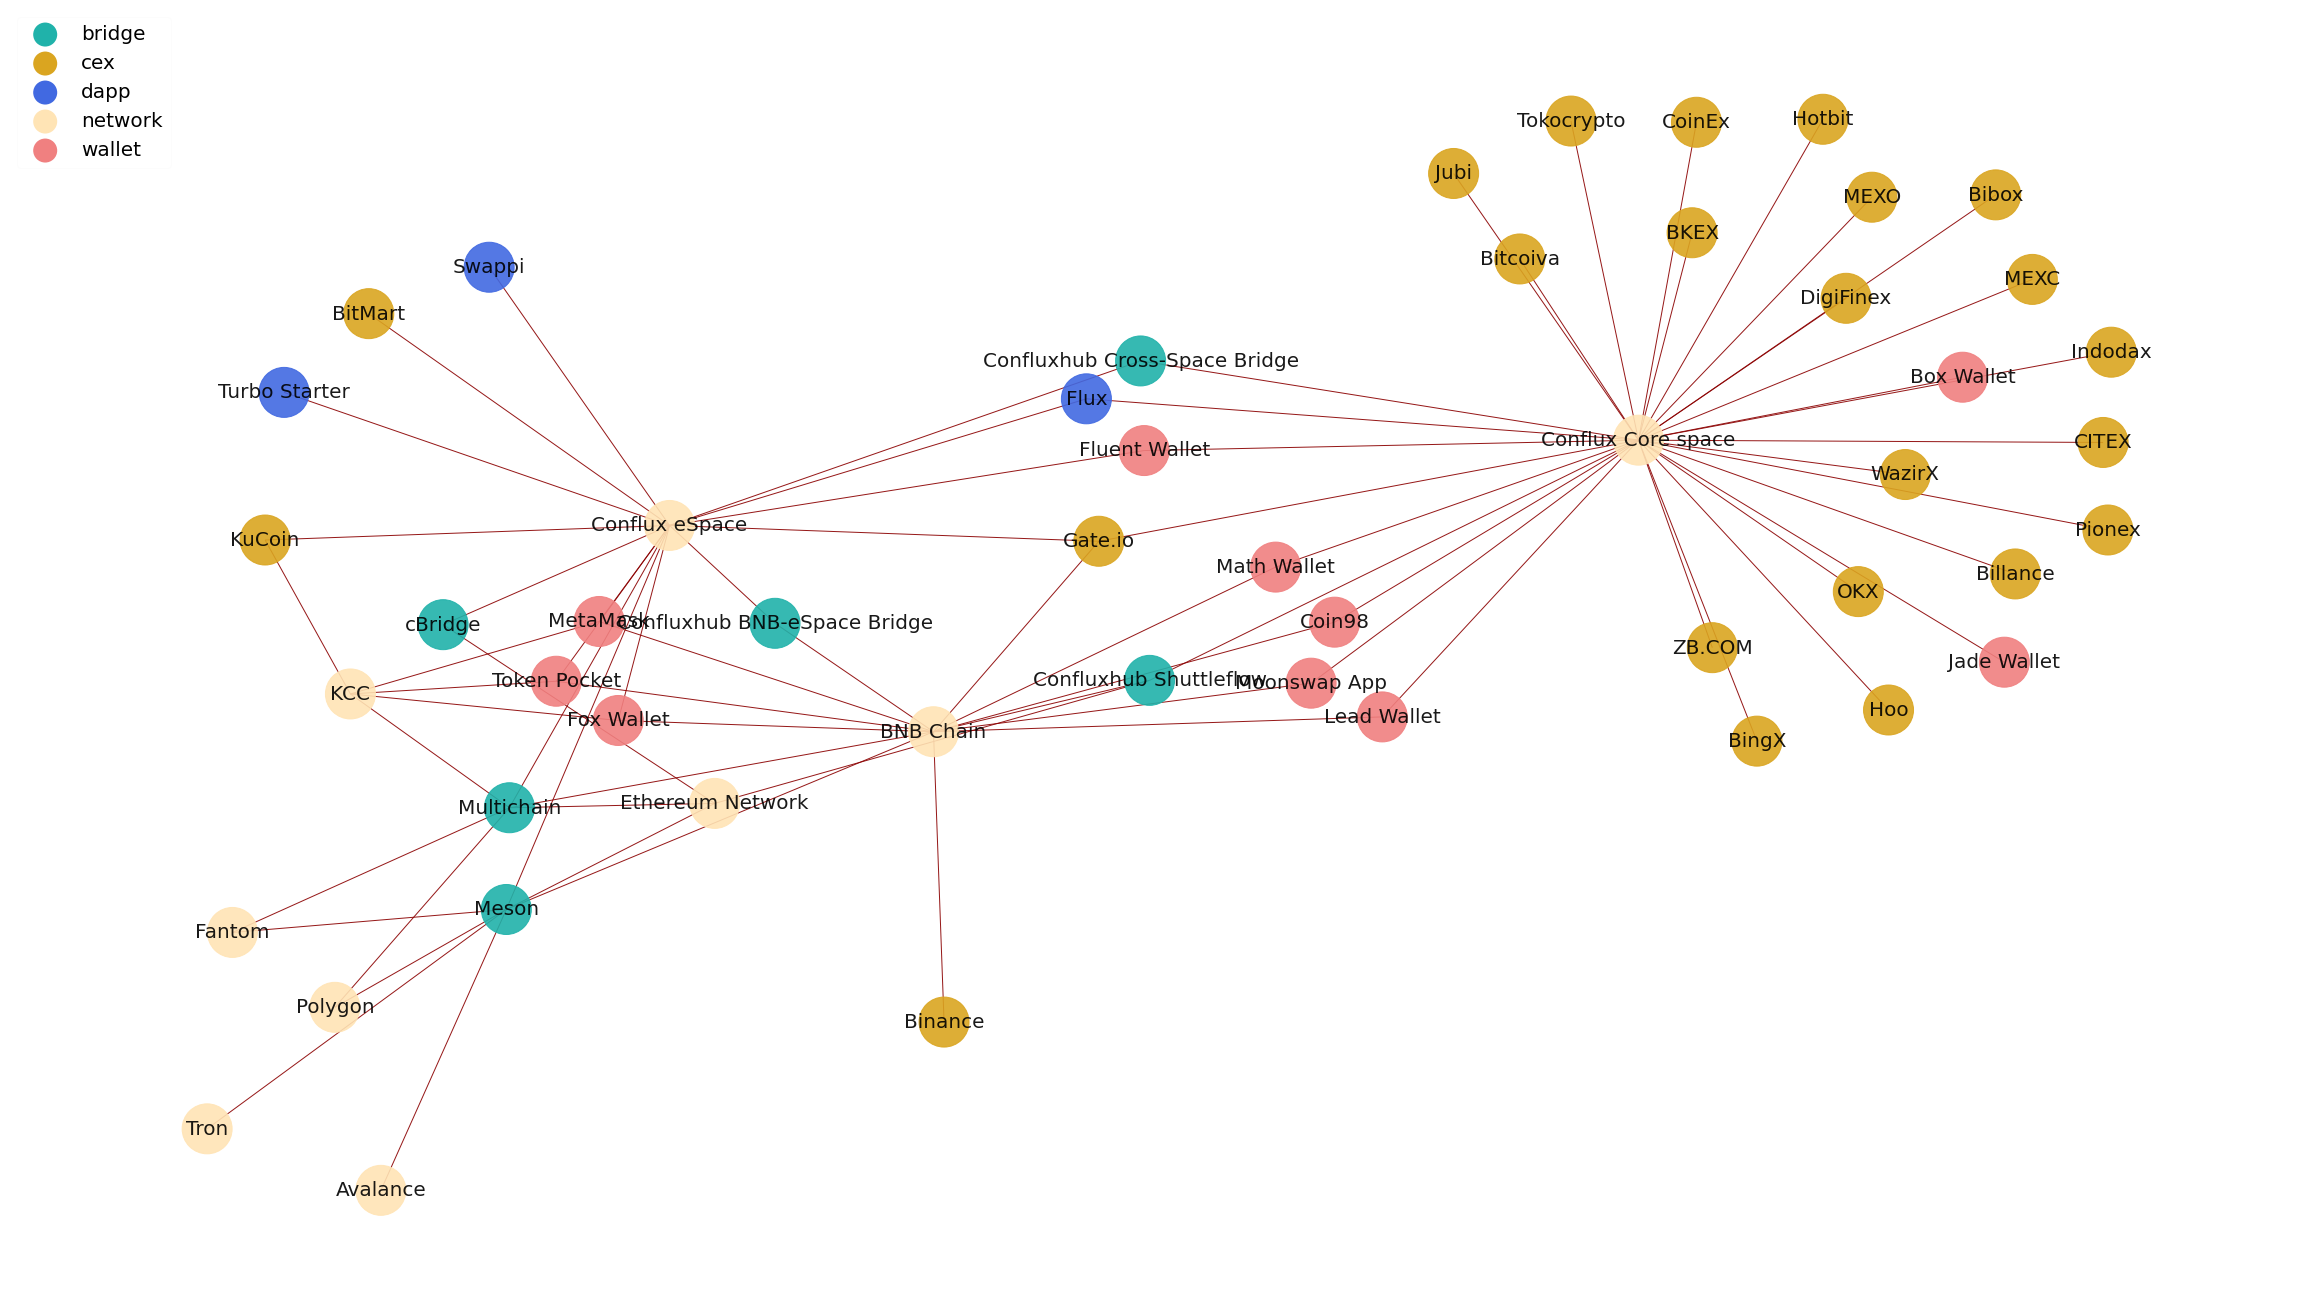

In [377]:
#### no coins or tokens but with token groups

def chartAllButTokensGrouped(merged,nodes,links):
    
    merged= merged[merged["predicate"]!="is_native_coin_on"]
    merged= merged[merged["predicate"]!="has_native_coin"]
    merged= merged[merged["predicate"]!="contract_deployed_on"]
    merged= merged[merged["predicate"]!="has_contract"]
    merged= merged[merged["predicate"]!="member_listed_on"]
    merged= merged[merged["predicate"]!="has_listed_member_of"]
    merged= merged[merged["predicate"]!="is_member_of"]
    merged= merged[merged["predicate"]!="has_member"]
    
    G = nx.from_pandas_edgelist(merged,source="name_x",target="name_y")

    types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
    types = types[types["ID"].isin(list(G.nodes))]
    types = types.set_index('ID')
    types = types.reindex(G.nodes())
    types['type'] = pd.Categorical(types['type'])

    catlist = list(types['type'].cat.categories)
    catcodes = list(types['type'].cat.codes)

    filtered_colors = master_colors[0:len(catlist)]
    cmap = matplotlib.colors.ListedColormap(filtered_colors)

    fig = plt.figure(1, figsize=(32, 18))
    
    nx.draw_spring(G,
                    with_labels = True, 
                    font_size=20, 
                    font_family="sans-serif", 
                    node_size=2500,
                    node_color=catcodes,
                    cmap=cmap,
                    edge_color='darkred',
                    alpha = .9
                    )
    
    for i in catlist:
        plt.scatter([],
                    [],
                    c=cmap.colors[catlist.index(i)],
                    edgecolors='none', label=i)


    plt.legend(loc='upper left',
               framealpha=0.05, 
               markerscale= 4,
               prop={'size': 20}
              )
    
    plt.savefig('everything_but_coins.png', transparent=True)
    
chartAllButTokensGrouped(merged,nodes,links)

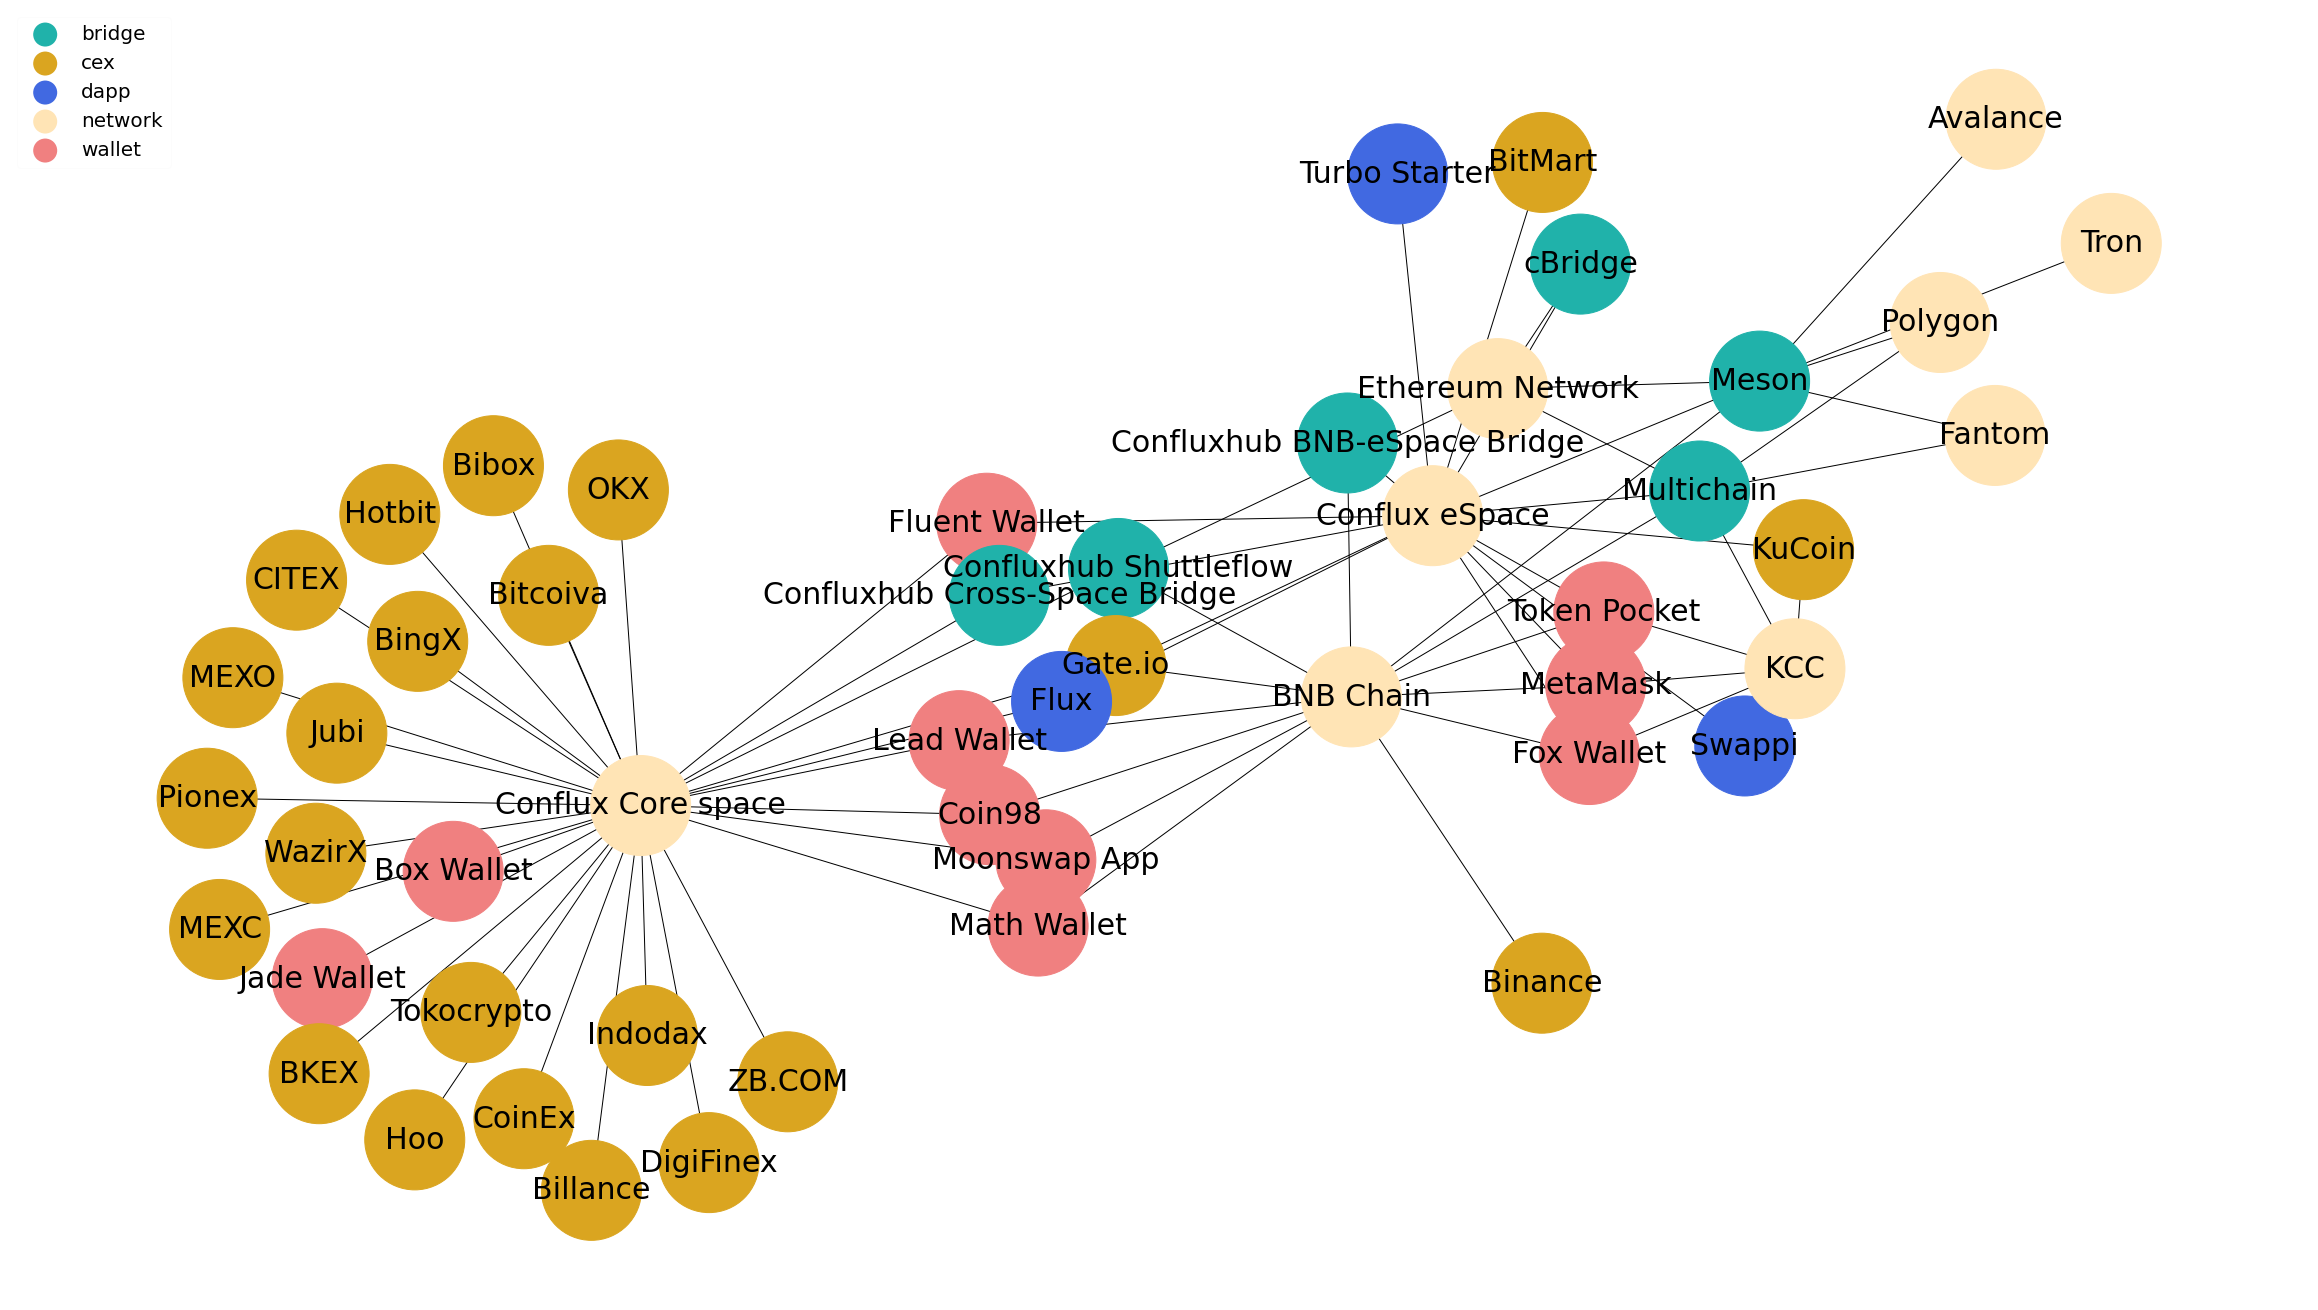

In [378]:
#### no coins or tokens or token groups

def chartNoCoinsOrTokens(merged,nodes,links):
    merged= merged[merged["predicate"]!="is_native_coin_on"]
    merged= merged[merged["predicate"]!="has_native_coin"]
    merged= merged[merged["predicate"]!="contract_deployed_on"]
    merged= merged[merged["predicate"]!="has_contract"]
    merged= merged[merged["predicate"]!="member_listed_on"]
    merged= merged[merged["predicate"]!="has_listed_member_of"]
    merged= merged[merged["predicate"]!="is_member_of"]
    merged= merged[merged["predicate"]!="has_member"]
    ####

    G = nx.from_pandas_edgelist(merged,source="name_x",target="name_y")

    types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
    types = types[types["ID"].isin(list(G.nodes))]
    types = types.set_index('ID')
    types = types.reindex(G.nodes())
    types['type'] = pd.Categorical(types['type'])

    catlist = list(types['type'].cat.categories)
    catcodes = list(types['type'].cat.codes)

    filtered_colors = master_colors[0:len(catlist)]
    cmap = matplotlib.colors.ListedColormap(filtered_colors)

    fig = plt.figure(1, figsize=(32, 18))
    
    nx.draw_spring(G,
                    with_labels = True,
                    font_size=30,
                    font_family="sans-serif",
                    node_size=10000,
                    node_color=types['type'].cat.codes, cmap=cmap
                    )
    
    for i in catlist:
        plt.scatter([],
                    [],
                    c=cmap.colors[catlist.index(i)],
                    edgecolors='none', label=i)


    plt.legend(loc='upper left',
               framealpha=0.05, 
               markerscale= 4,
               prop={'size': 20}
              )
    
chartNoCoinsOrTokens(merged,nodes,links)

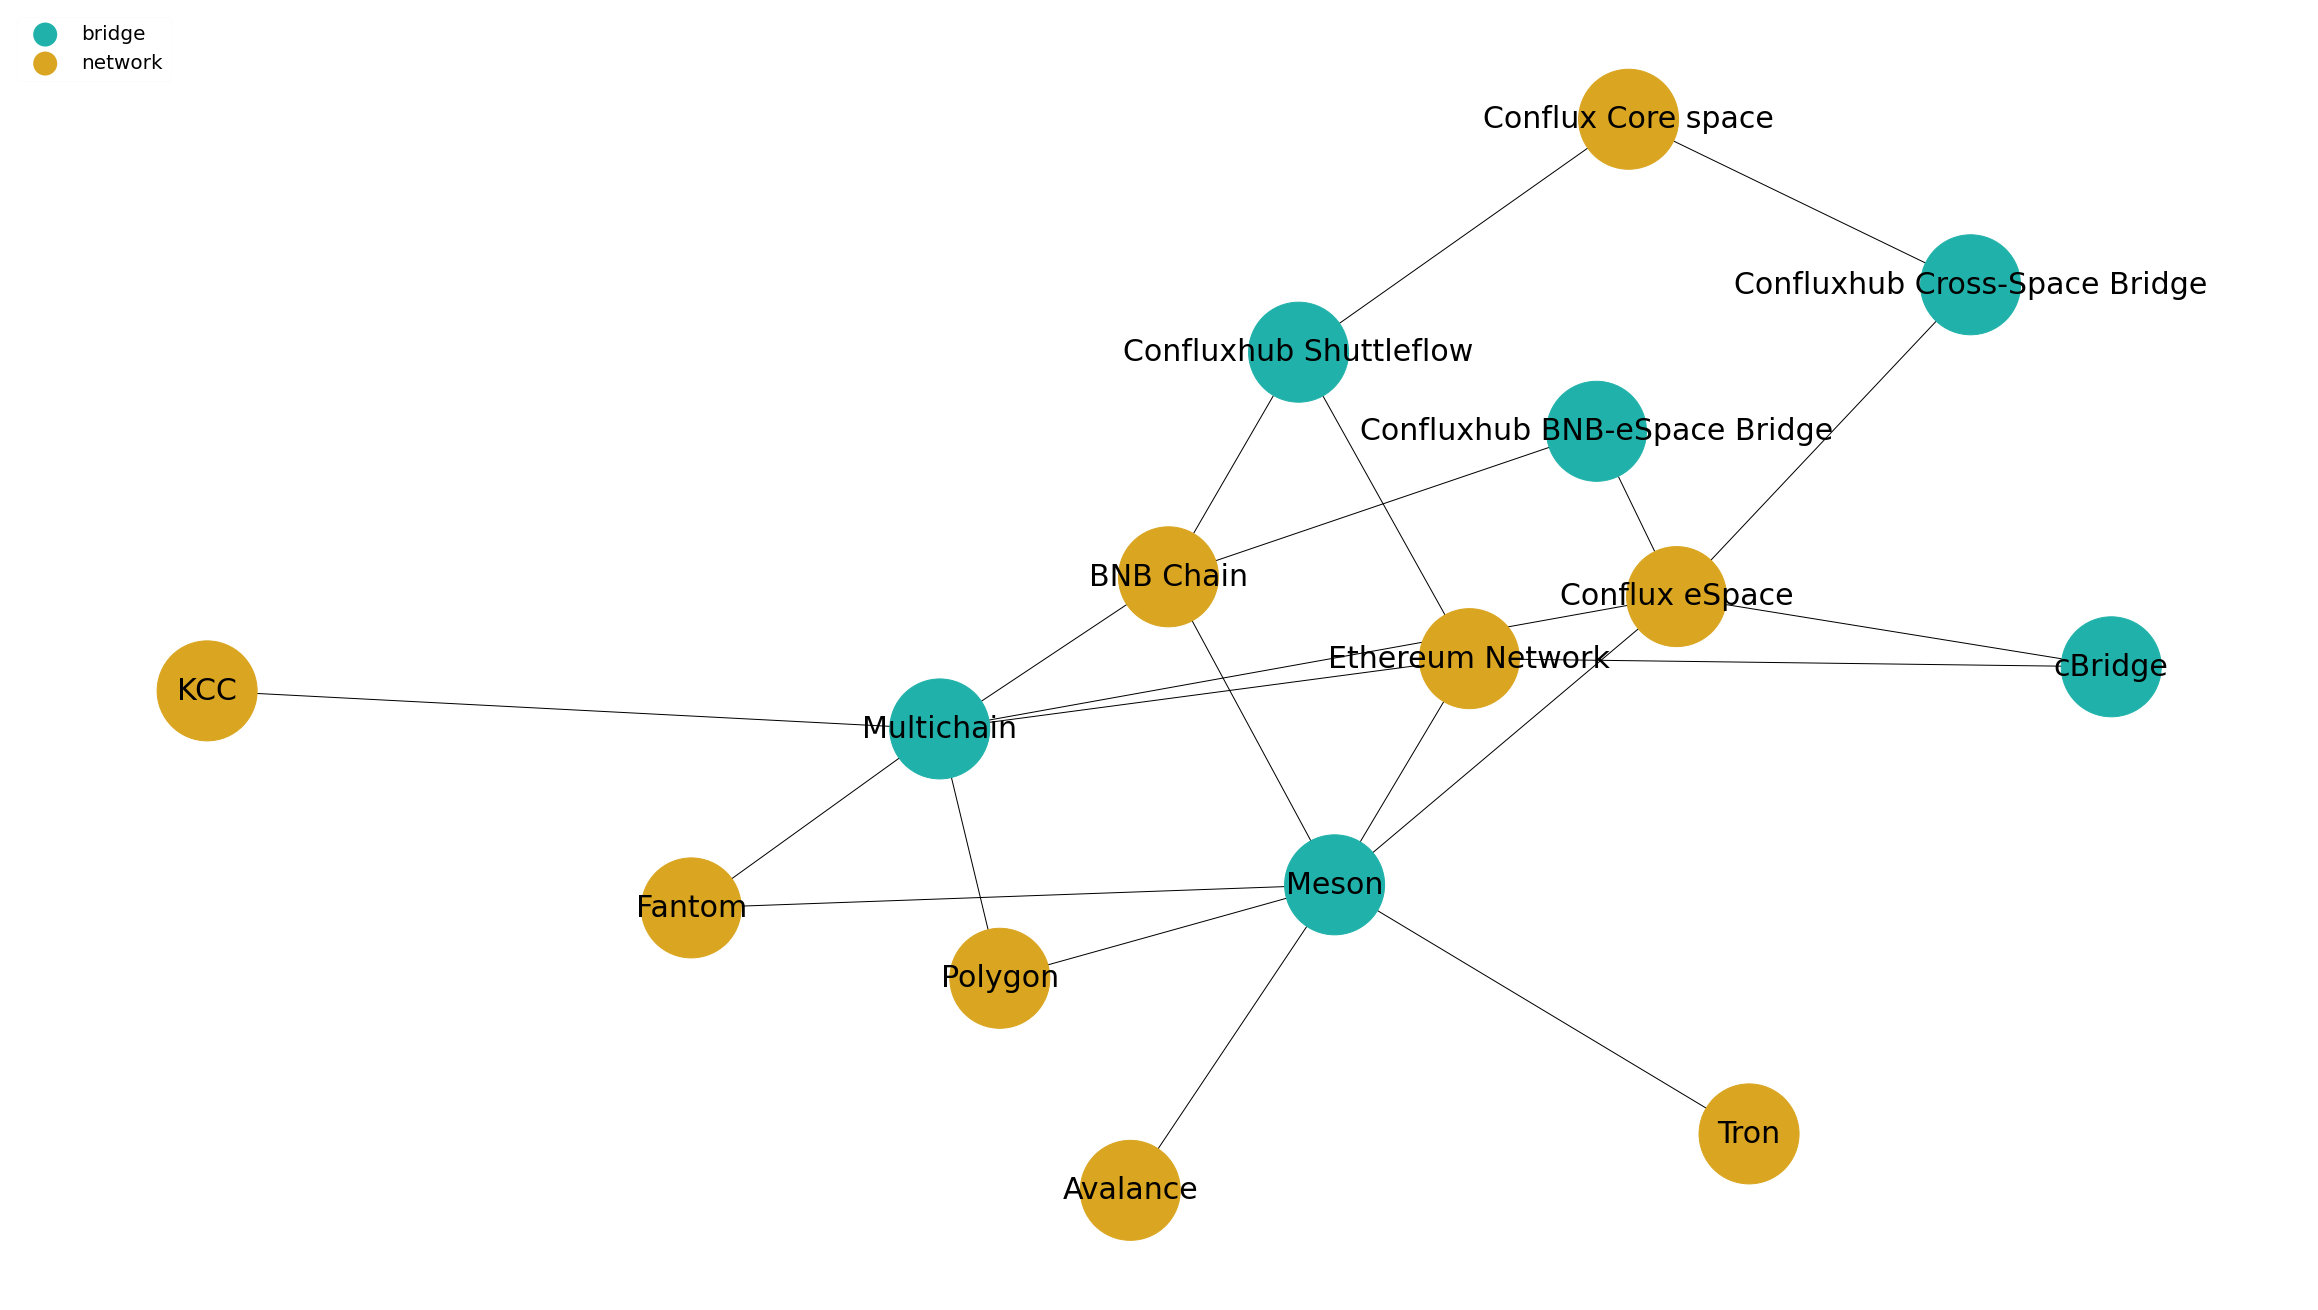

In [379]:
#### only bridges and networks

def chartBridgesNetworks(merged,nodes,links):
    merged= merged[
        (merged["type_x"]=="bridge") | (merged["type_y"]=="bridge")
    ]
    merged
    G = nx.from_pandas_edgelist(merged,source="name_x",target="name_y")

    types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
    types = types[types["ID"].isin(list(G.nodes))]
    types = types.set_index('ID')
    types = types.reindex(G.nodes())
    types['type'] = pd.Categorical(types['type'])

    catlist = list(types['type'].cat.categories)
    catcodes = list(types['type'].cat.codes)

    filtered_colors = master_colors[0:len(catlist)]
    cmap = matplotlib.colors.ListedColormap(filtered_colors)

    fig = plt.figure(1, figsize=(32, 18))
    
    nx.draw_spring(G,
                    with_labels = True,
                    font_size=30,
                    font_family="sans-serif",
                    node_size=10000,
                    node_color=catcodes, cmap=cmap
                    )
    
    for i in catlist:
        plt.scatter([],
                    [],
                    c=cmap.colors[catlist.index(i)],
                    edgecolors='none', label=i)


    plt.legend(loc='upper left',
               framealpha=0.05, 
               markerscale= 4,
               prop={'size': 20}
              )
    
chartBridgesNetworks(merged,nodes,links)

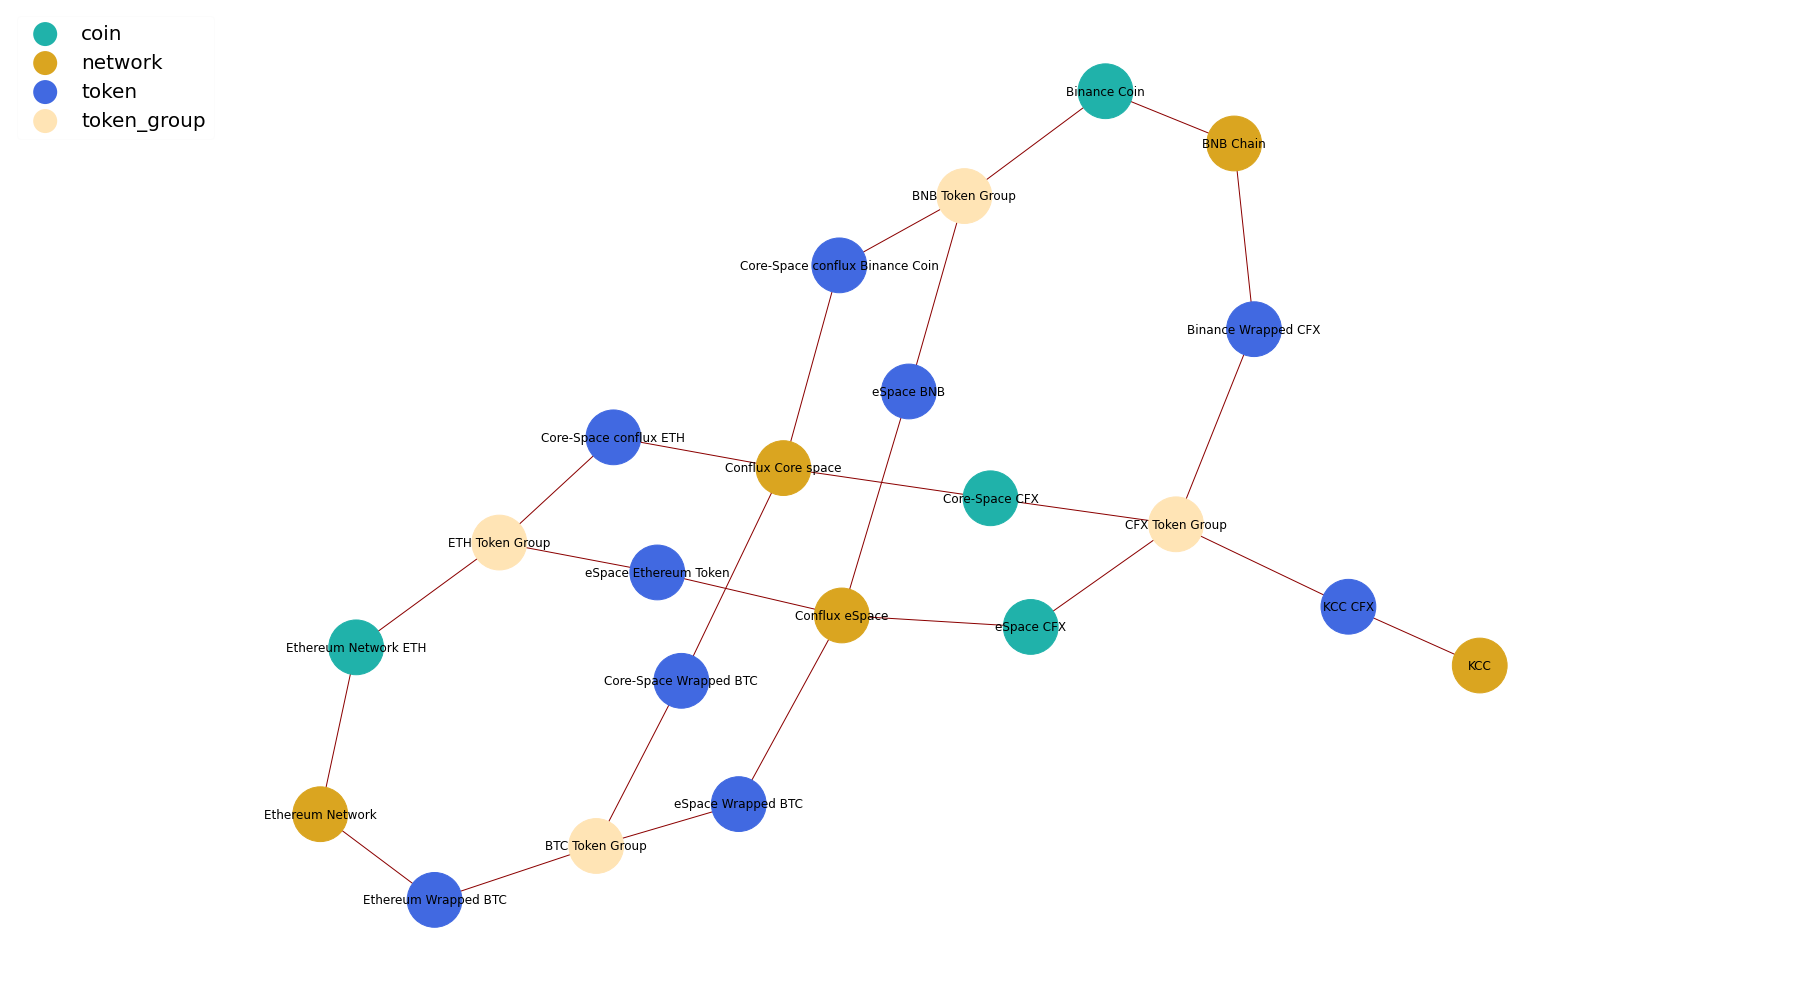

In [380]:
#### tokens and coins

def chartTokensCoins(merged,nodes,links):
    merged= merged[merged["predicate"].isin([
        "is_native_coin_on",
        "has_native_coin",
        "is_member_of",
        "has_member",
        "contract_deployed_on",
        "has_contract",
        #"member_listed_on",
        #"has_listed_member_of"
    ])]

    G = nx.from_pandas_edgelist(merged,source="name_x",target="name_y")

    types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
    types = types[types["ID"].isin(list(G.nodes))]
    types = types.set_index('ID')
    types = types.reindex(G.nodes())
    types['type'] = pd.Categorical(types['type'])

    catlist = list(types['type'].cat.categories)
    catcodes = list(types['type'].cat.codes)

    filtered_colors = master_colors[0:len(catlist)]
    cmap = matplotlib.colors.ListedColormap(filtered_colors)

    fig = plt.figure(1, figsize=(32, 18))
    plt.margins(x=0.2)
    
    pos = nx.spring_layout(G)
    
    '''
    pos = nx.circular_layout(G)
    radii = [15,25,7]  # for concentric circles
    
    for ea in pos.keys():
        new_r = 1
        if types.loc[ea]['type'] in ['token','coin']:
            new_r = radii[0]
        elif types.loc[ea]['type'] in ['network']:
            new_r = radii[1]
        elif types.loc[ea]['type'] in ['token_group']:
            new_r = radii[2]
        pos[ea] *= new_r   # reposition nodes as concentric circles
    '''
    nx.draw(G,
            pos=pos,
            with_labels = True,
            font_size=12,
            font_family="sans-serif",
            node_size=3000,
            node_color=types['type'].cat.codes, 
            cmap=cmap,
            edge_color='darkred'
           )
    
    for i in catlist:
        plt.scatter([],
                    [],
                    c=cmap.colors[catlist.index(i)],
                    edgecolors='none', label=i)


    plt.legend(loc='upper left',
               framealpha=0.05, 
               markerscale= 4,
               prop={'size': 20}
              )
    
chartTokensCoins(merged,nodes,links)

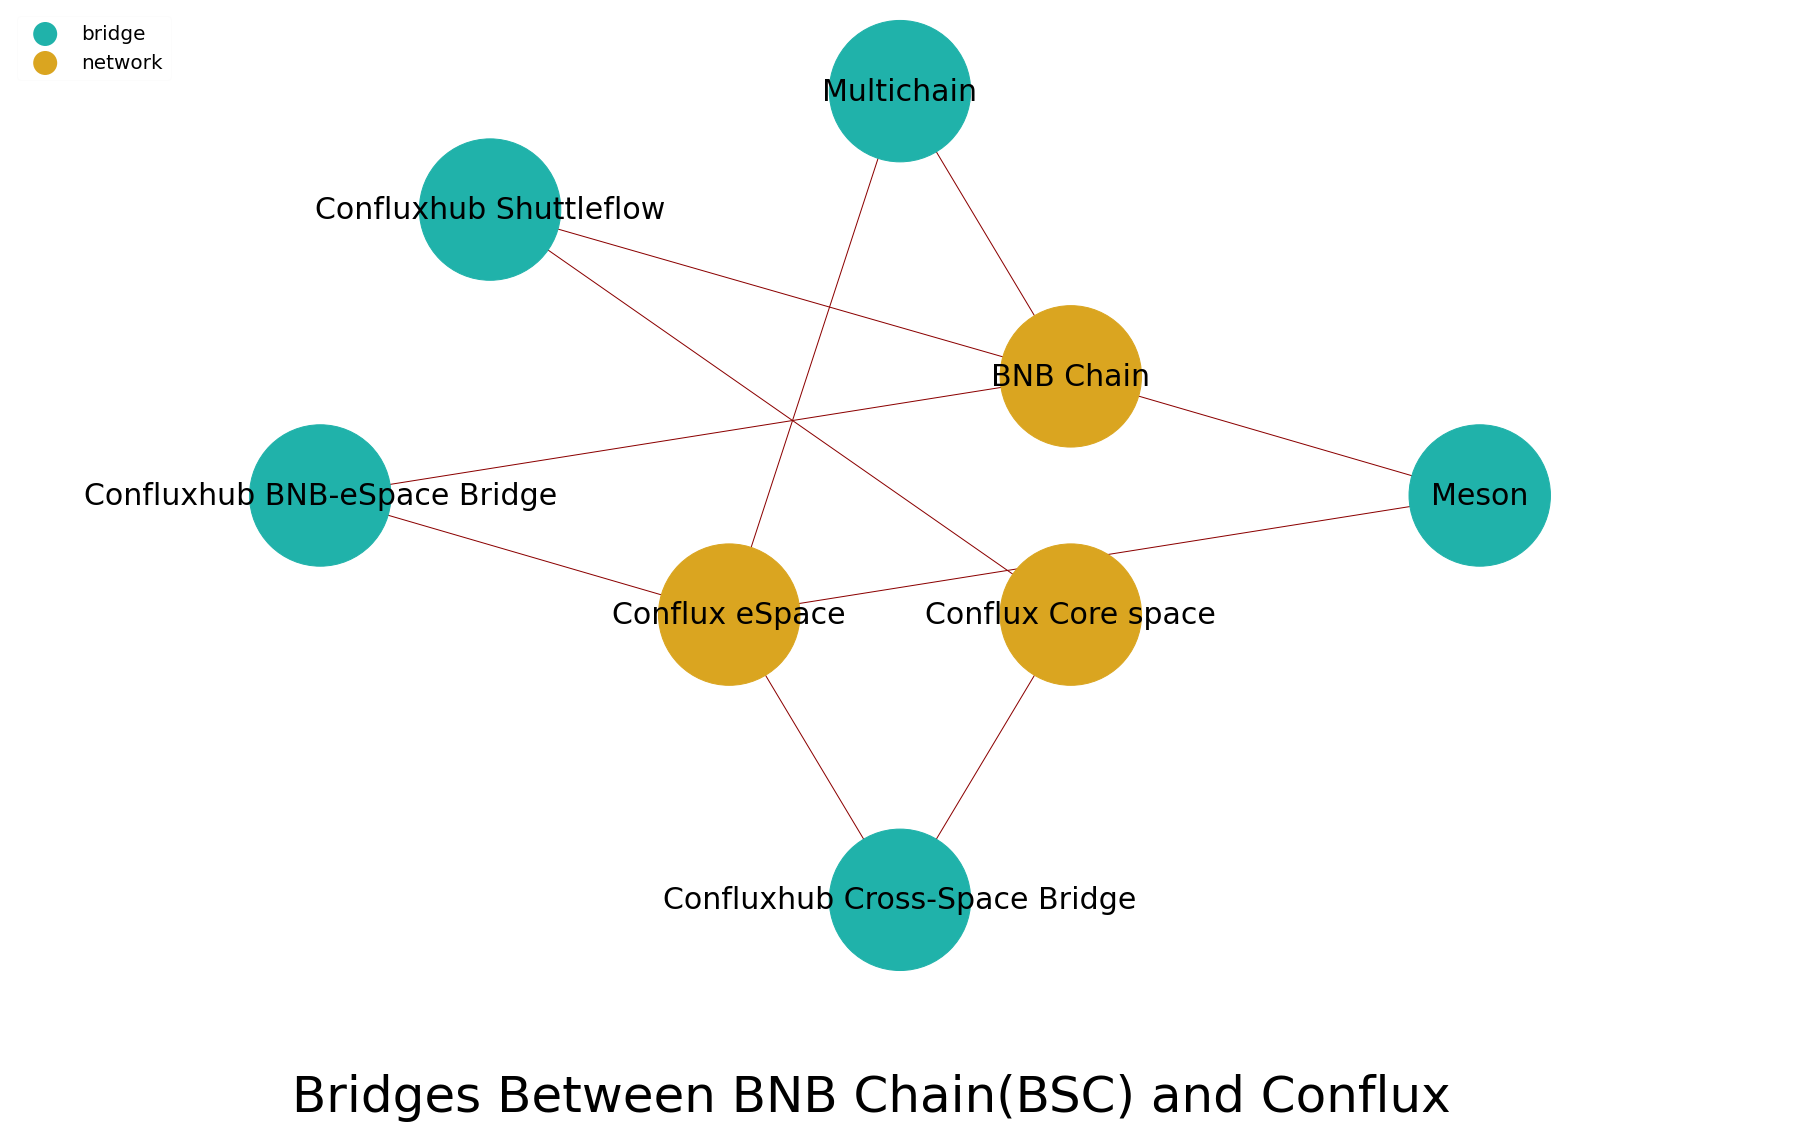

In [381]:
# Bridges Between BNB Chain(BSC) and Conflux

test = merged[
        (
            merged["id_y"].isin(["7b760c3b-f49f-4cd8-8ab0-57e06cc0e484",
                              "4967a41b-13e6-4c0e-adae-331ef39b6183",
                              "ea32cfb5-53b2-4aa1-bd65-baac7ca041fc",
                             ])
        )
        & (
            merged["type_x"]=="bridge"
        )
        & (
                merged["id_x"]!="c0cdbcc4-092a-4cdd-b1b0-99ebf743dfb1"
            )
    ]


G = nx.from_pandas_edgelist(test,source="name_x",target="name_y")

types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
types = types[types["ID"].isin(list(G.nodes))]
types = types.set_index('ID')
types = types.reindex(G.nodes())
types['type'] = pd.Categorical(types['type'])

catlist = list(types['type'].cat.categories)
catcodes = list(types['type'].cat.codes)

filtered_colors = master_colors[0:len(catlist)]
cmap = matplotlib.colors.ListedColormap(filtered_colors)


fig = plt.figure(1, figsize=(32, 18))
plt.margins(x=0.2)
fig.suptitle("Bridges Between BNB Chain(BSC) and Conflux",
             x=0.5,
             y=0.02,
             horizontalalignment='center',
             verticalalignment="bottom",
             size="50"
            )

pos = nx.circular_layout(G)


radii = [60,25]  # for concentric circles


for ea in pos.keys():
    new_r = 1
    if len(test[test["name_y"]==ea]) > 0:
        new_r = radii[1]
    else:
        new_r = radii[0]
    pos[ea] *= new_r   # reposition nodes as concentric circles

nx.draw(G,
        pos=pos,
        with_labels = True, 
        font_size=30, 
        font_color="black", 
        node_size=20000,
        node_color=types['type'].cat.codes, cmap=cmap,
        edge_color='darkred'
)

for i in catlist:
    plt.scatter([],[], c=cmap.colors[catlist.index(i)], # insert value for color
                edgecolors='none', label=i)


plt.legend(loc='upper left',
           framealpha=0.05, 
           markerscale= 4,
           prop={'size': 20}
          )

plt.savefig('cfx_bsc.png', transparent=False)

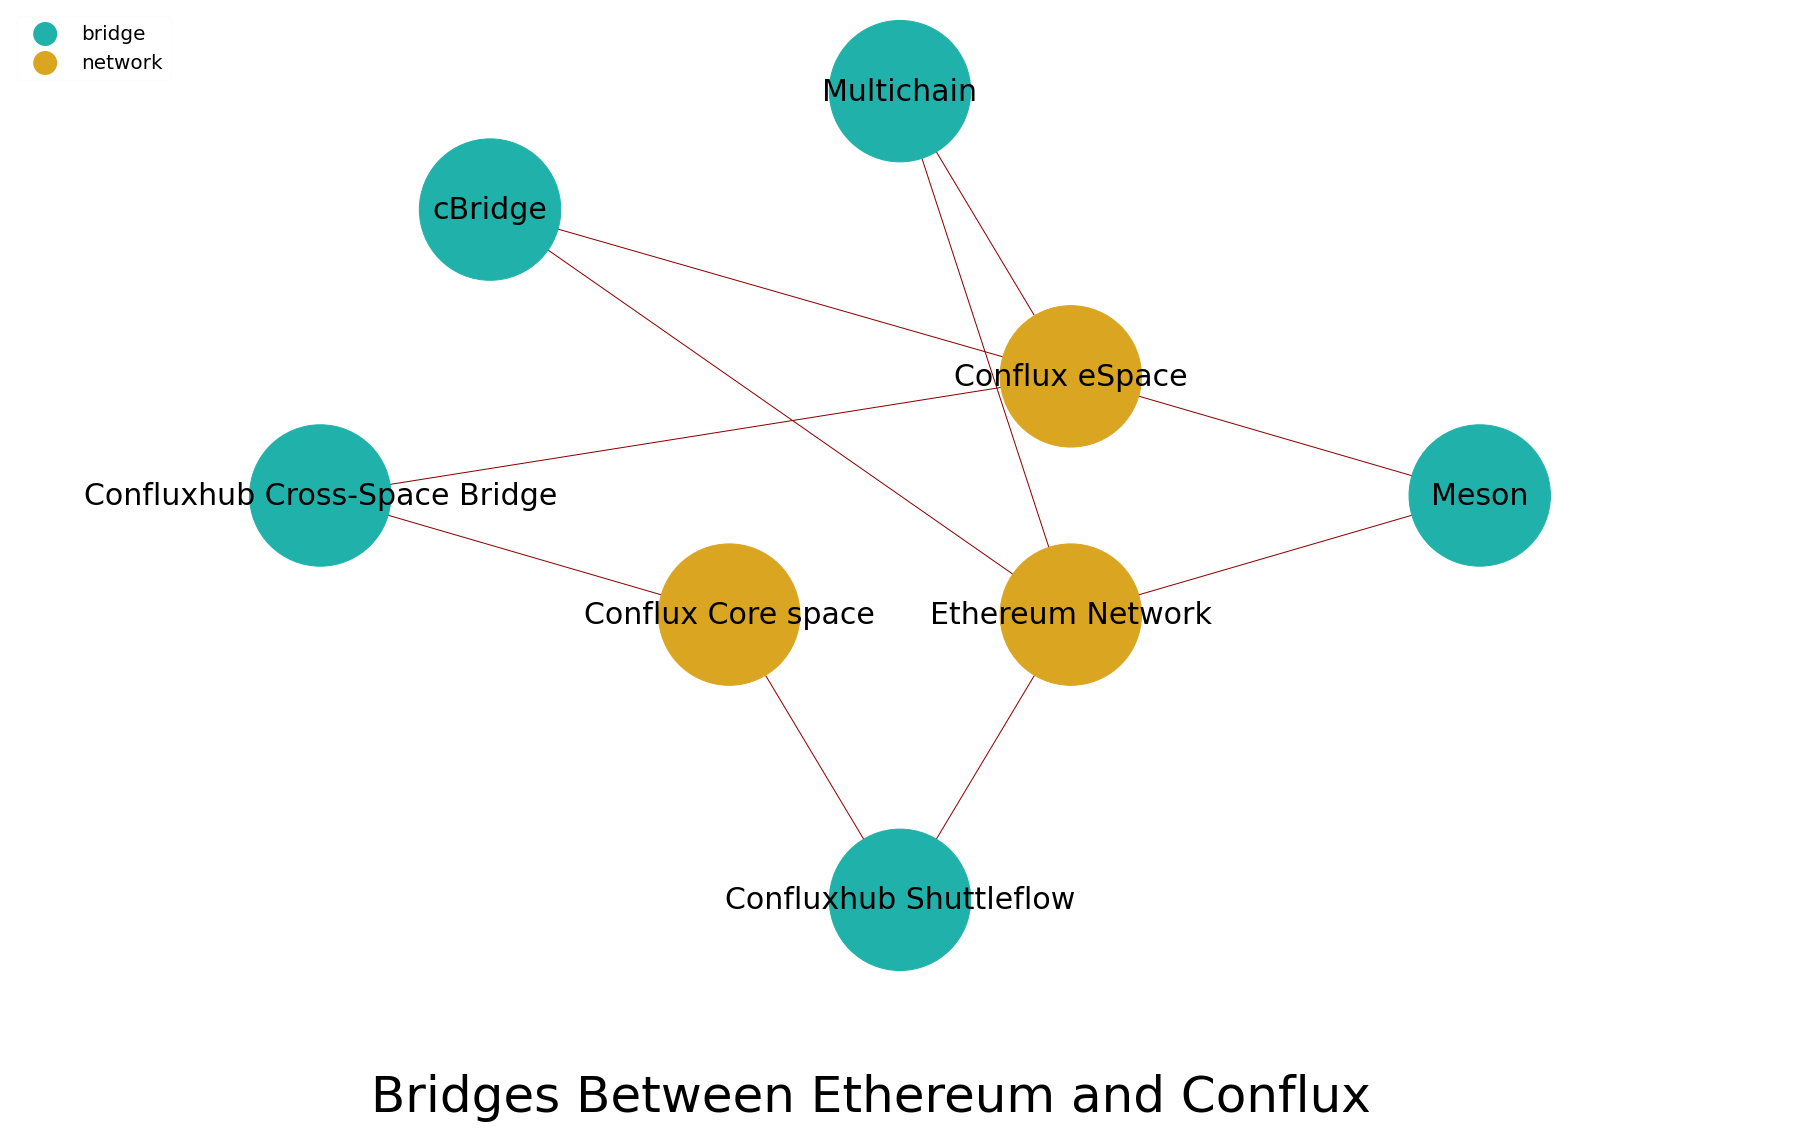

In [403]:
# Bridges Between Ethereum and Conflux

test = merged[
        (
            merged["id_y"].isin(["7b760c3b-f49f-4cd8-8ab0-57e06cc0e484",
                              "4967a41b-13e6-4c0e-adae-331ef39b6183",
                                 "4d8fafd5-7938-4f80-9e18-59e5a92059a2"
                             ])
        )
        & (
            merged["type_x"]=="bridge"
        )
        & (
            merged["source"]!="024eb4f2-81ed-4a89-84f0-b23f5b67364b"
        )
    ]


G = nx.from_pandas_edgelist(test,source="name_x",target="name_y")

types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
types = types[types["ID"].isin(list(G.nodes))]
types = types.set_index('ID')
types = types.reindex(G.nodes())
types['type'] = pd.Categorical(types['type'])

catlist = list(types['type'].cat.categories)
catcodes = list(types['type'].cat.codes)

filtered_colors = master_colors[0:len(catlist)]
cmap = matplotlib.colors.ListedColormap(filtered_colors)


fig = plt.figure(1, figsize=(32, 18))

fig.suptitle("Bridges Between Ethereum and Conflux",
             x=0.5,
             y=0.02,
             horizontalalignment='center',
             verticalalignment="bottom",
             size="50"
            )

plt.margins(x=0.2)

pos = nx.circular_layout(G)

radii = [60,25]  # for concentric circles


for ea in pos.keys():
    new_r = 1
    if len(test[test["name_y"]==ea]) > 0:
        new_r = radii[1]
    else:
        new_r = radii[0]
    pos[ea] *= new_r   # reposition nodes as concentric circles

nx.draw(G,
        pos=pos,
        with_labels = True, 
        font_size=30, 
        font_color="black", 
        node_size=20000,
        node_color=catcodes,
        cmap=cmap,
        edge_color='darkred'  
)

for i in catlist:
    plt.scatter([],[], c=cmap.colors[catlist.index(i)], # insert value for color
                edgecolors='none', label=i)


plt.legend(loc='upper left',
           framealpha=0.05, 
           markerscale= 4,
           prop={'size': 20}
          )

plt.savefig('cfx_eth.png', transparent=True)

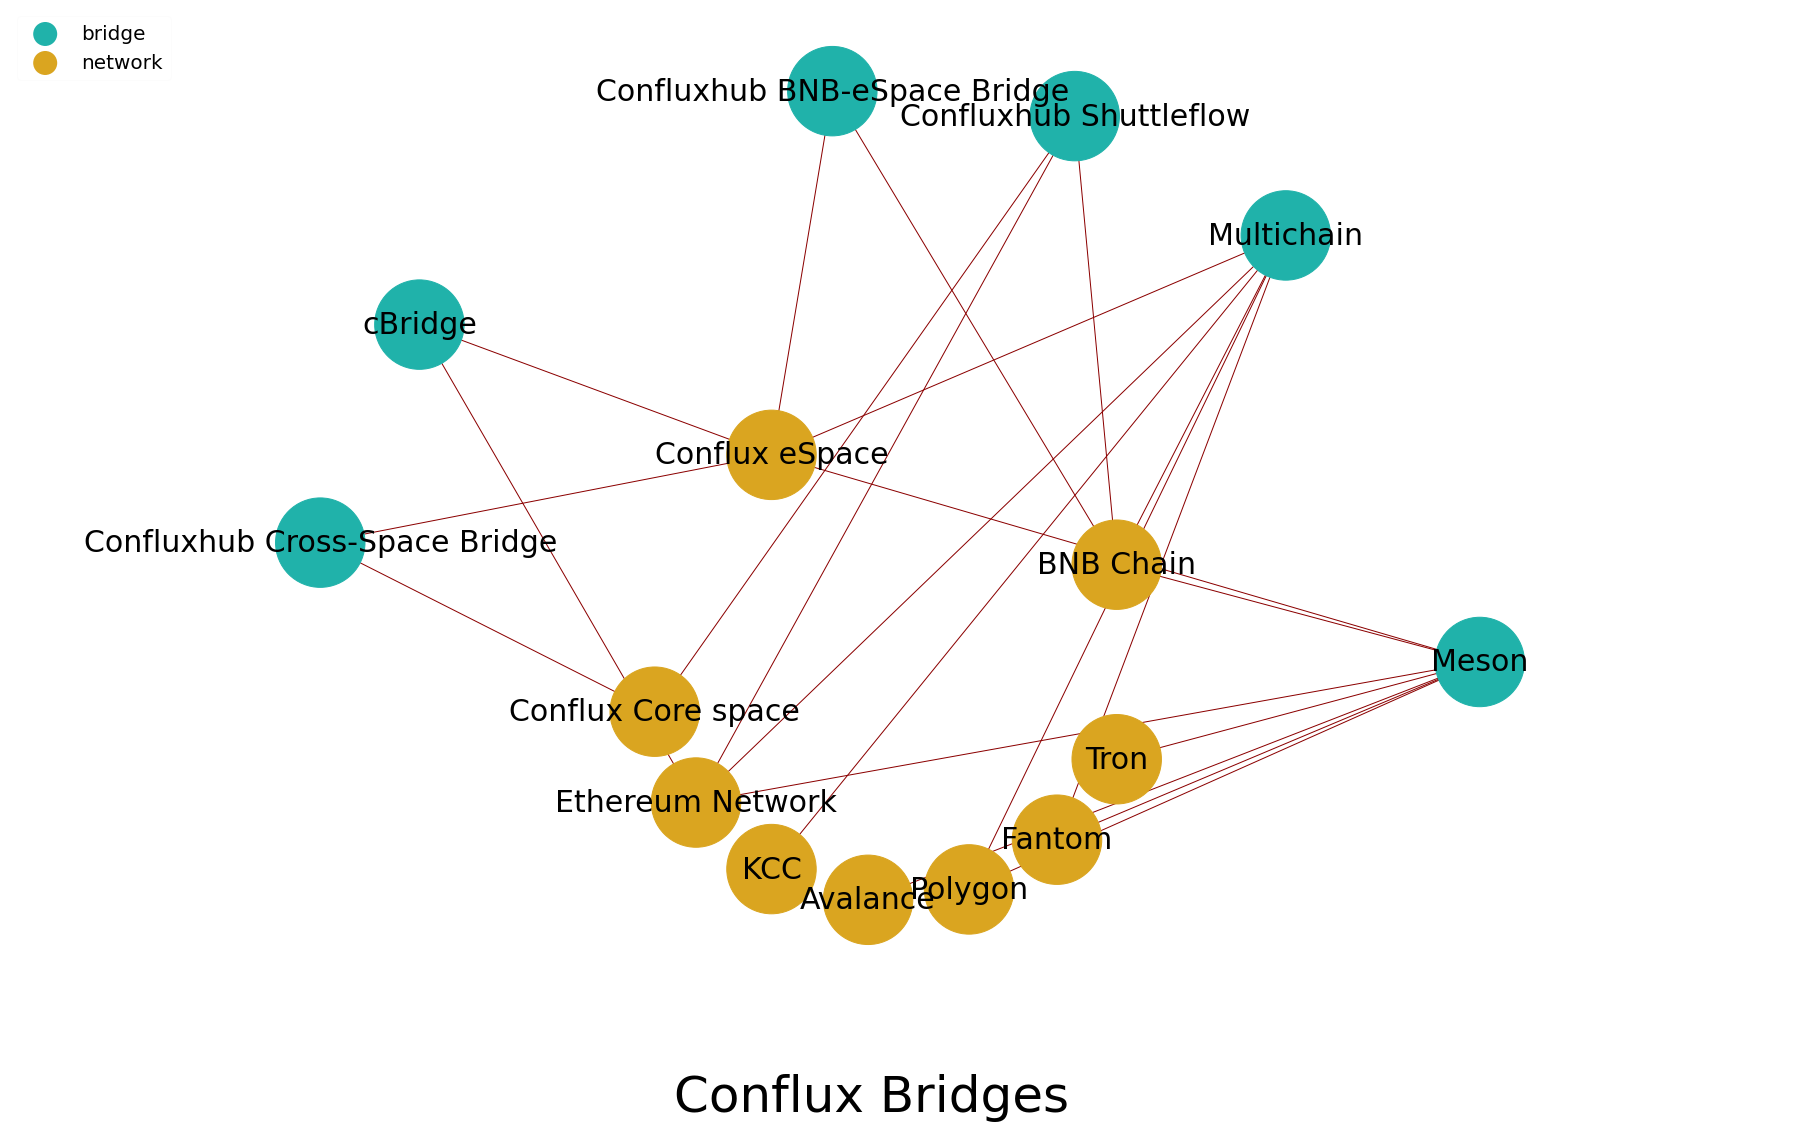

In [407]:
# All Conflux Bridges

test = merged[
        (merged["type_x"]=="bridge") | (merged["type_y"]=="bridge")
        & (merged["type_x"].isin(["coin","token"]))
    ]


G = nx.from_pandas_edgelist(test,source="name_x",target="name_y")

types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
types = types[types["ID"].isin(list(G.nodes))]
types = types.set_index('ID')
types = types.reindex(G.nodes())
types['type'] = pd.Categorical(types['type'])

catlist = list(types['type'].cat.categories)
catcodes = list(types['type'].cat.codes)

master_colors=['lightseagreen', 'goldenrod', 'royalblue','tan', 'lightcoral','green','tomato','darkblue']
filtered_colors = master_colors[0:len(catlist)]
cmap = matplotlib.colors.ListedColormap(filtered_colors)

fig = plt.figure(1, figsize=(32, 18))
plt.margins(x=0.2)
fig.suptitle("Conflux Bridges",
             x=0.5,
             y=0.02,
             horizontalalignment='center',
             verticalalignment="bottom",
             size="50"
            )

pos = nx.circular_layout(G)


radii = [60,25]  # for concentric circles


for ea in pos.keys():
    new_r = 1
    if len(test[test["name_y"]==ea]) > 0:
        new_r = radii[1]
    else:
        new_r = radii[0]
    pos[ea] *= new_r   # reposition nodes as concentric circles

nx.draw(G,
        pos=pos,
        with_labels = True, 
        font_size=30, 
        font_color="black", 
        node_size=8000,
        node_color=catcodes,
        cmap=cmap,
        edge_color='darkred'
)

for i in catlist:
    plt.scatter([],[], c=cmap.colors[catlist.index(i)], # insert value for color
                edgecolors='none', label=i)


plt.legend(loc='upper left',
           framealpha=0.05, 
           markerscale= 4,
           prop={'size': 20}
          )

plt.savefig('bridges2.png', transparent=False)

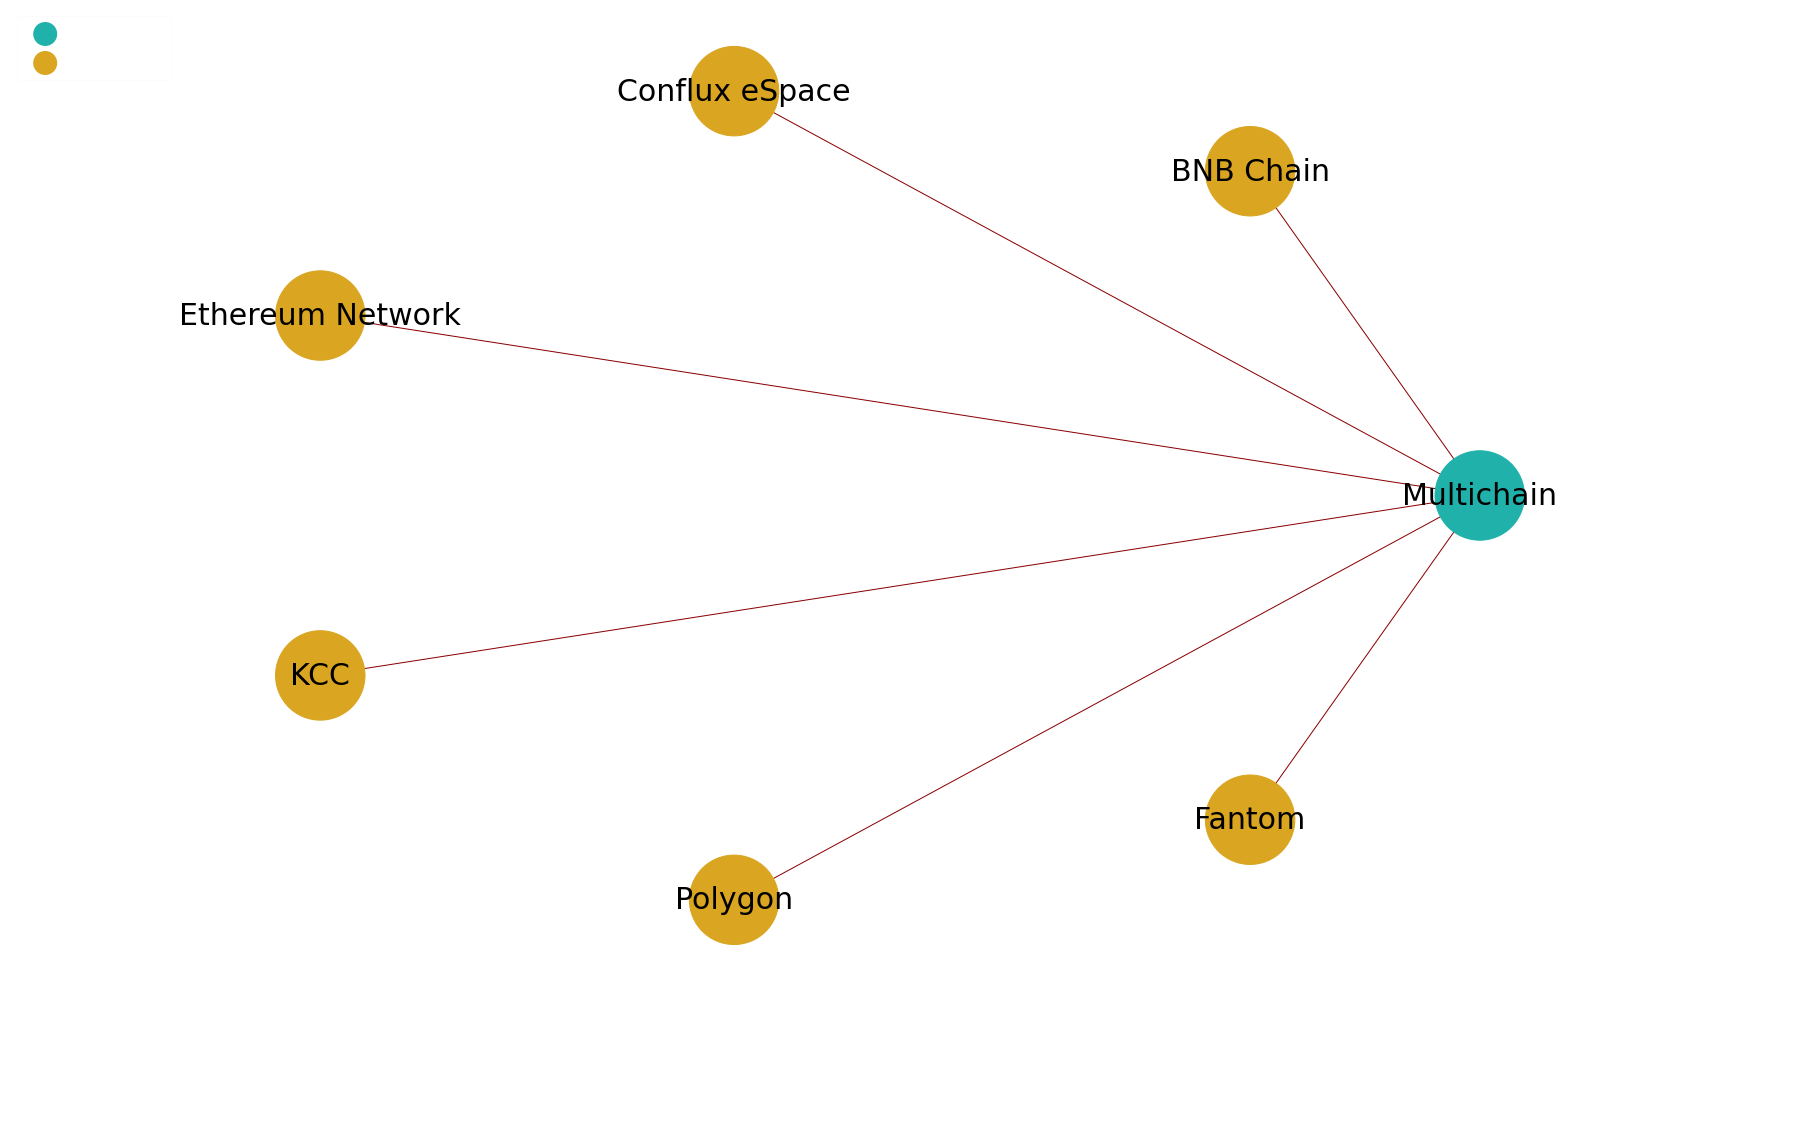

In [384]:
# Multichain

test = merged[
        (merged["id_x"]=="28676732-6705-47a4-964a-e41bf886e38f") | (merged["id_y"]=="28676732-6705-47a4-964a-e41bf886e38f")
    ]


G = nx.from_pandas_edgelist(test,source="name_x",target="name_y")

types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
types = types[types["ID"].isin(list(G.nodes))]
types = types.set_index('ID')
types = types.reindex(G.nodes())
types['type'] = pd.Categorical(types['type'])

catlist = list(types['type'].cat.categories)
catcodes = list(types['type'].cat.codes)

filtered_colors = master_colors[0:len(catlist)]
cmap = matplotlib.colors.ListedColormap(filtered_colors)

plt.rcParams['text.color'] = 'white'
fig = plt.figure(1, figsize=(32, 18))
#fig.patch.set_facecolor('black')
plt.margins(x=0.2)
fig.suptitle("Conflux Through Multichain",
             x=0.5,
             y=0.02,
             horizontalalignment='center',
             verticalalignment="bottom",
             size="50"
            )

pos = nx.circular_layout(G)

radii = [60,25]  # for concentric circles


for ea in pos.keys():
    new_r = 1
    if len(test[test["name_y"]==ea]) > 0:
        new_r = radii[1]
    else:
        new_r = radii[0]
    pos[ea] *= new_r   # reposition nodes as concentric circles

nx.draw(G,
        pos=pos,
        with_labels = True, 
        font_size=30, 
        font_color="black", 
        node_size=8000,
        node_color=catcodes,
        cmap=cmap,
        edge_color='darkred'
)

for i in catlist:
    plt.scatter([],[], c=cmap.colors[catlist.index(i)], # insert value for color
                edgecolors='none', label=i)


plt.legend(loc='upper left',
           framealpha=0.05, 
           markerscale= 4,
           prop={'size': 20}
          )

#plt.savefig('bridges2.png', transparent=False)

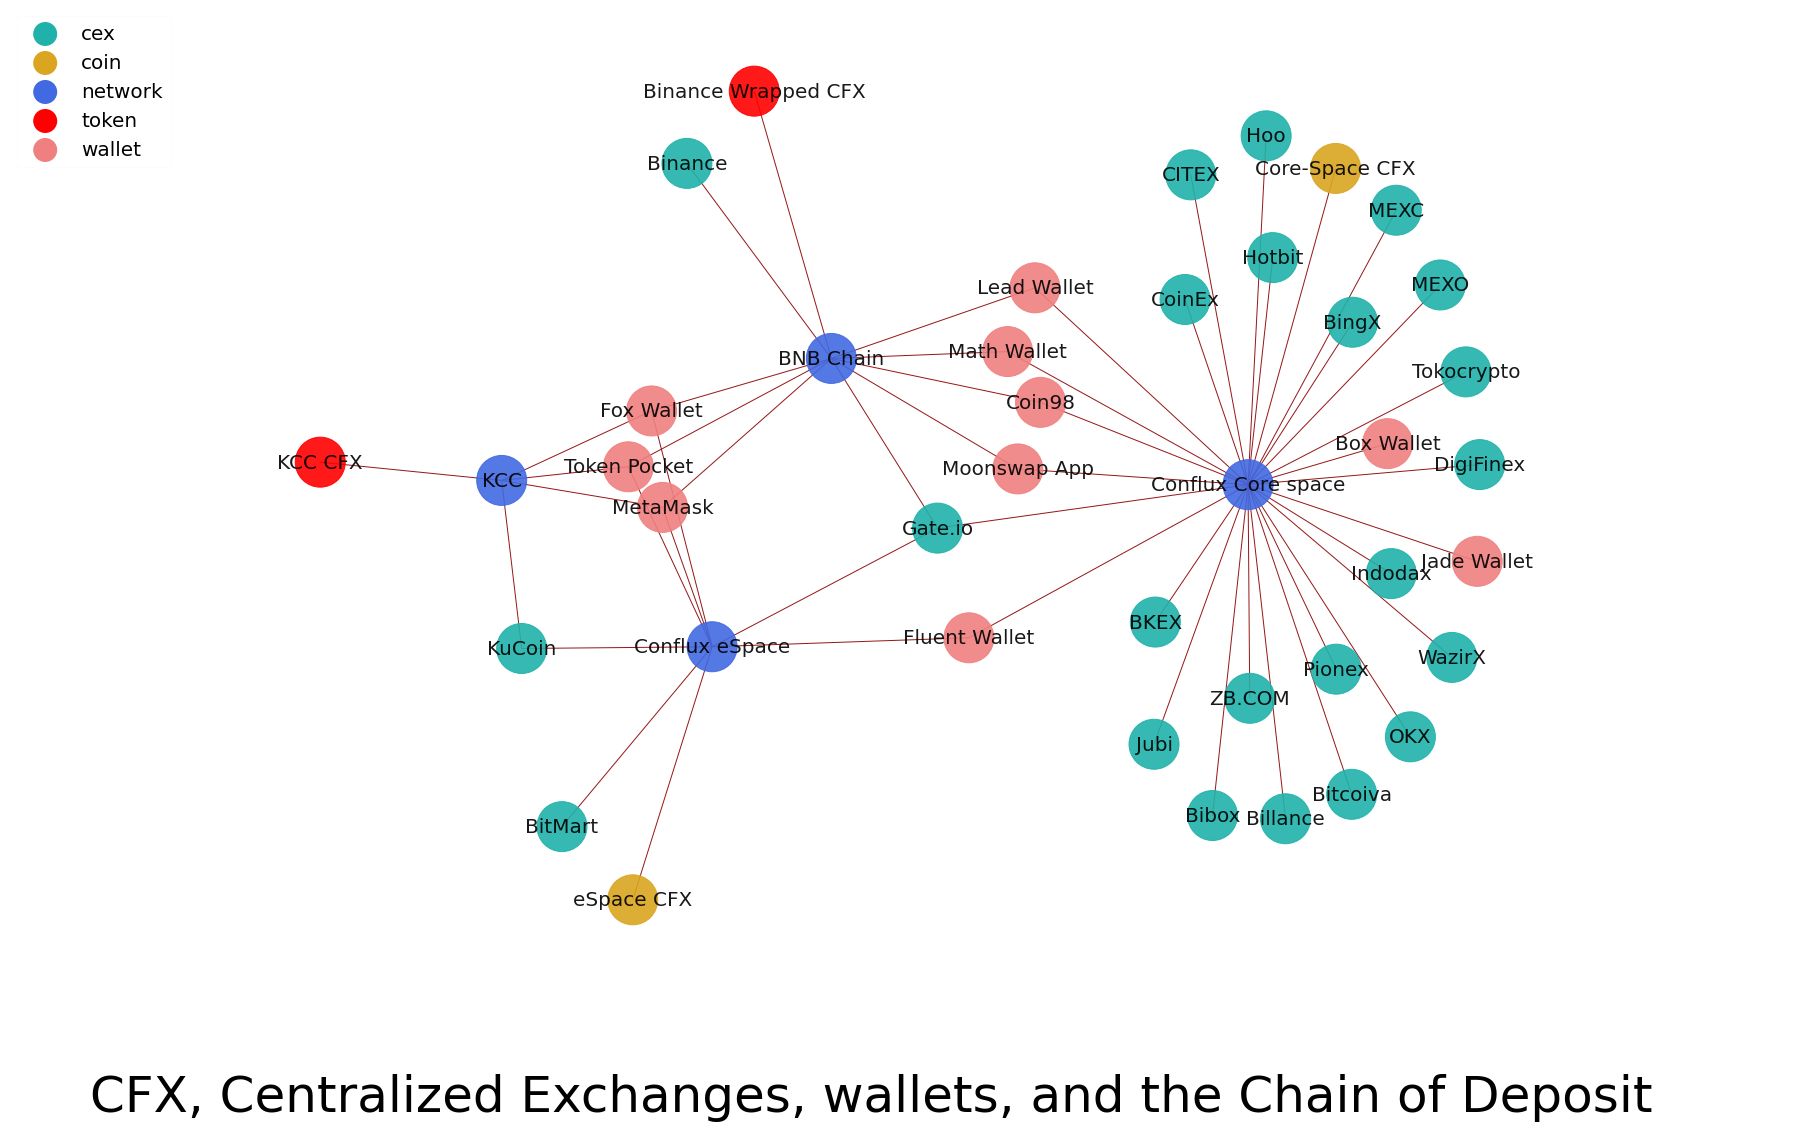

In [481]:
# CEX

test = merged[
        (merged["type_y"]=="cex")
        | (merged["type_x"]=="wallet")
        & (merged["type_x"]!="token_group") 
        & (merged["type_y"]!="token_group")
        #| (merged["type_x"]=="bridge") | (merged["type_y"]=="bridge")
        | (merged["id_x"].isin([
            "3e193e28-b9e1-456e-849f-ffd982a68e1b",
            "96f57f81-d2b8-4a14-8caa-eb621a13c73a",
            "cfe5c5fd-88a6-4128-8756-b7a636733336",
            "cb8983d8-5d01-4b4b-8d0b-6703e6d893c1"
        ])
           & (merged["type_x"]!="token_group") 
           & (merged["type_y"]!="token_group")
        )
        #| (merged["type_x"]=="bridge") | (merged["type_y"]=="bridge")
    ]

#plt.rcParams['axes.facecolor'] = 'white'
G = nx.from_pandas_edgelist(test,source="name_x",target="name_y")

types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
types = types[types["ID"].isin(list(G.nodes))]
types = types.set_index('ID')
types = types.reindex(G.nodes())
types['type'] = pd.Categorical(types['type'])

catlist = list(types['type'].cat.categories)
catcodes = list(types['type'].cat.codes)

filtered_colors = master_colors[0:len(catlist)]
cmap = matplotlib.colors.ListedColormap(filtered_colors)


plt.rcParams['text.color'] = 'black'
fig = plt.figure(1, figsize=(32, 18))
#fig.patch.set_facecolor('white')
plt.margins(x=0.2)
fig.suptitle("CFX, Centralized Exchanges, wallets, and the Chain of Deposit",
             x=0.5,
             y=0.02,
             horizontalalignment='center',
             verticalalignment="bottom",
             size="50"
            )

pos = nx.circular_layout(G)

radii = [36,6,12,12]  # for concentric circles

for ea in pos.keys():
    new_r = 1
    if types.loc[ea]['type'] in ['token','coin']:
        new_r = radii[0]
    elif types.loc[ea]['type'] in ['network']:
        new_r = radii[1]
    elif types.loc[ea]['type'] in ['cex']:
        new_r = radii[2]
    elif types.loc[ea]['type'] in ['wallet']:
        new_r = radii[3]
    pos[ea] *= new_r   # reposition nodes as concentric circles


nx.draw(G,
        pos=nx.spring_layout(G),
        #pos=pos,
        with_labels = True, 
        font_size=20, 
        font_color="black", 
        node_size=2500,
        node_color=catcodes,
        cmap=cmap,
        edge_color='darkred',
        alpha = .9
)


for i in catlist:
    plt.scatter([],[], c=cmap.colors[catlist.index(i)], # insert value for color
                edgecolors='none', label=i)


plt.legend(loc='upper left',
           framealpha=0.05, 
           markerscale= 4,
           prop={'size': 20}
          )

plt.savefig('cfx_cex_where_to_deposit.png', transparent=True)


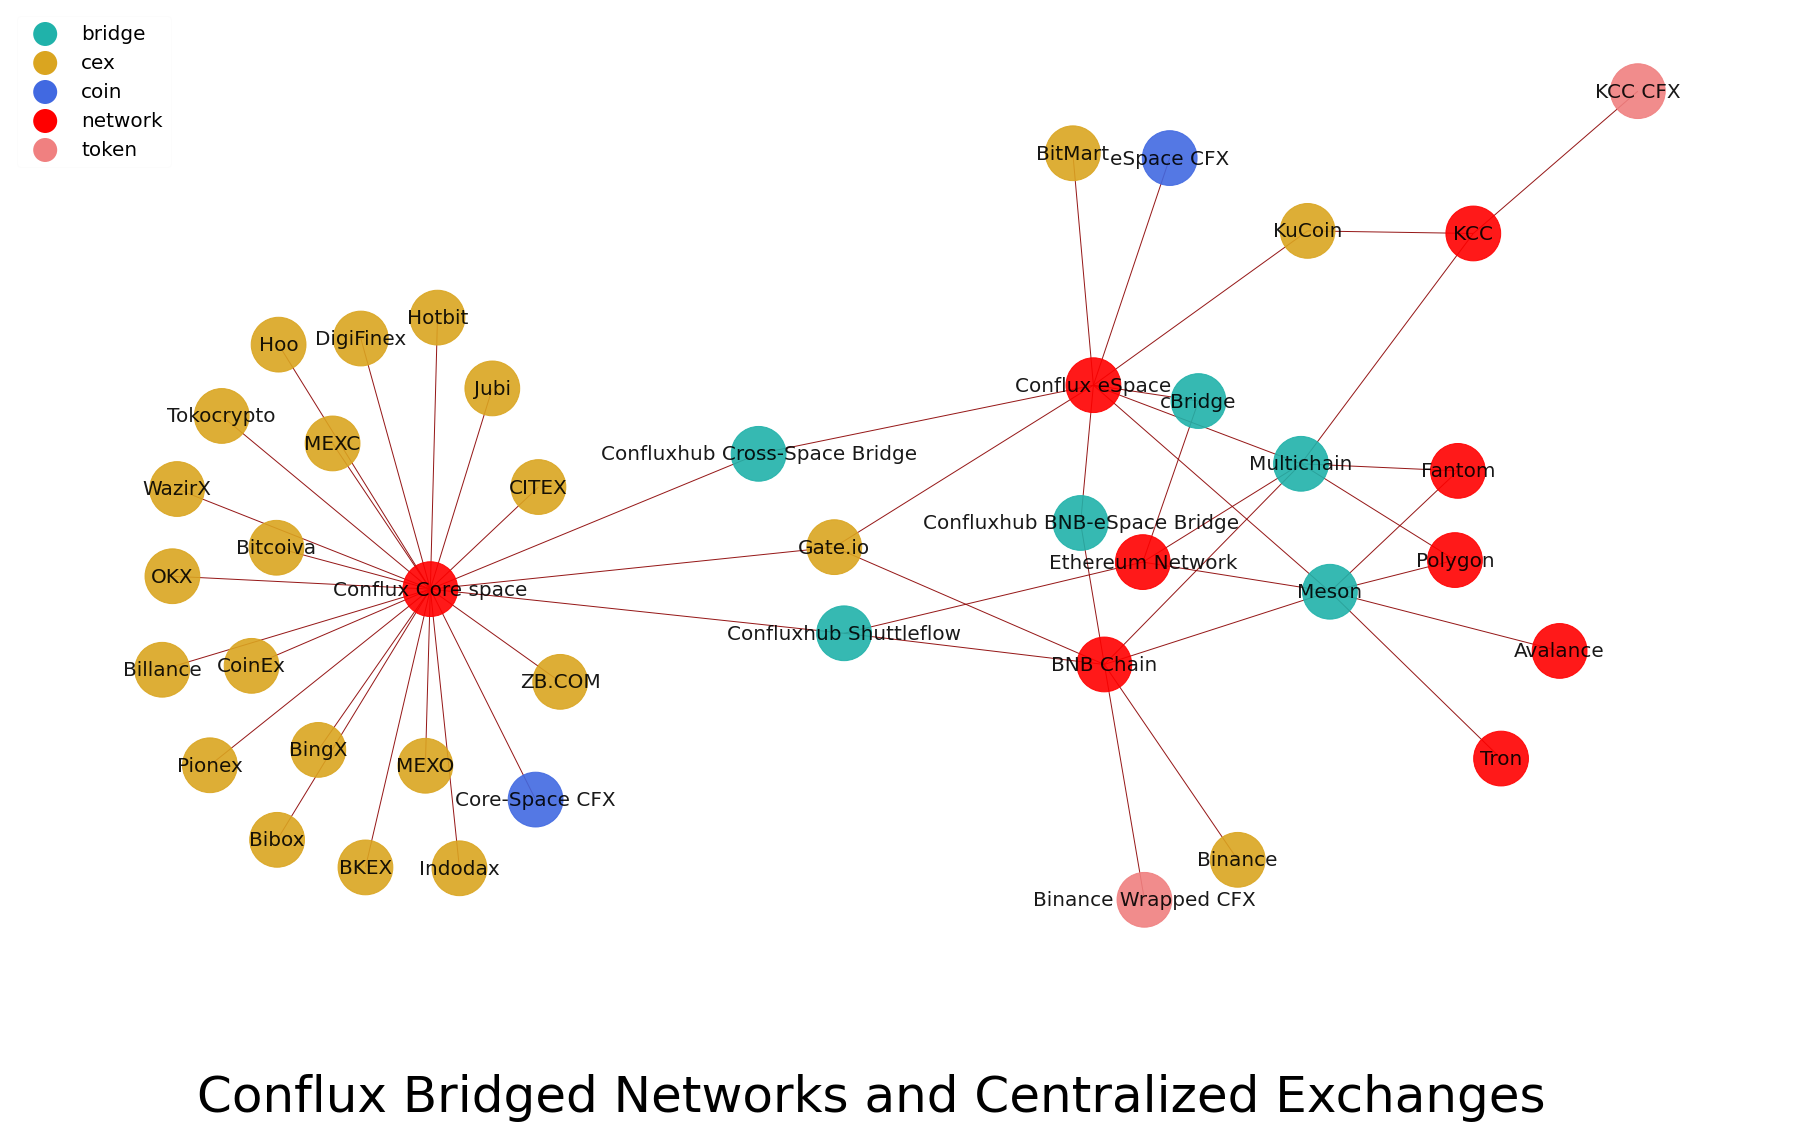

In [476]:
# CEX and Bridges oh my

test = merged[
        ((merged["type_x"]=="cex")
        | (merged["id_x"].isin([
            "3e193e28-b9e1-456e-849f-ffd982a68e1b",
            "96f57f81-d2b8-4a14-8caa-eb621a13c73a",
            "cfe5c5fd-88a6-4128-8756-b7a636733336",
            "cb8983d8-5d01-4b4b-8d0b-6703e6d893c1"
        ]))
        & (merged["type_x"]!="token_group") 
        & (merged["type_y"]!="token_group"))
        | (merged["type_x"]=="bridge") | (merged["type_y"]=="bridge")
    ]


G = nx.from_pandas_edgelist(test,source="name_x",target="name_y")

types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
types = types[types["ID"].isin(list(G.nodes))]
types = types.set_index('ID')
types = types.reindex(G.nodes())
types['type'] = pd.Categorical(types['type'])

catlist = list(types['type'].cat.categories)
catcodes = list(types['type'].cat.codes)

filtered_colors = master_colors[0:len(catlist)]
cmap = matplotlib.colors.ListedColormap(filtered_colors)

fig = plt.figure(1, figsize=(32, 18))
#fig.patch.set_facecolor('black')
plt.margins(x=0.05
           )
fig.suptitle("Conflux Bridged Networks and Centralized Exchanges",
             x=0.5,
             y=0.02,
             horizontalalignment='center',
             verticalalignment="bottom",
             size="50"
            )

pos = nx.circular_layout(G)


radii = [25,15,60]  # for concentric circles


for ea in pos.keys():
    new_r = 1
    if ea in ["Conflux Core space","Conflux eSpace","BNB Chain"]:
        new_r = radii[0]
    if ea in ["Gate.io","Binance","KuCoin"]:
        new_r = radii[1]
    else:
        new_r = radii[2]
    pos[ea] *= new_r   # reposition nodes as concentric circles

nx.draw(G,
        pos=nx.spring_layout(G),
        with_labels = True, 
        font_size=20,
        font_color="black", 
        node_size=3000,
        node_color=catcodes,
        cmap=cmap,
        edge_color='darkred',
        alpha = .9
)

for i in catlist:
    plt.scatter([],[], c=cmap.colors[catlist.index(i)], # insert value for color
                edgecolors='none', label=i)

plt.rcParams['text.color'] = 'black'
plt.legend(loc='upper left',
           framealpha=0.05, 
           markerscale= 4,
           prop={'size': 20}
          )

plt.savefig('cfx_cex_bridges.png', transparent=True)

In [387]:
from pyvis.network import Network

In [388]:
net = Network("1000px", "1000px", notebook=True)
net.from_nx(G)
# net.set_options(
#     """const options = {"physics": {"forceAtlas2Based": {"gravitationalConstant": -77,"centralGravity": 0.035,"springLength": 150,"avoidOverlap": 0.56},"minVelocity": 0.75,"solver": "forceAtlas2Based"}}"""
# )
net.show_buttons(filter_=['physics'])
net.show('pyvis.html')